# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [14]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import random
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pprint import pprint
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

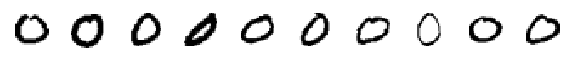

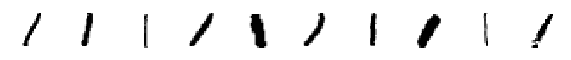

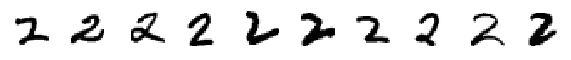

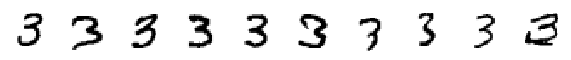

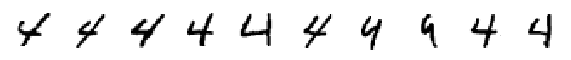

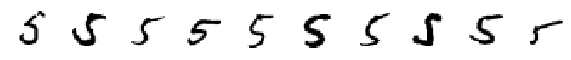

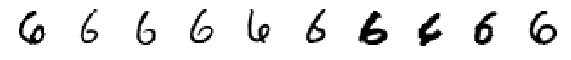

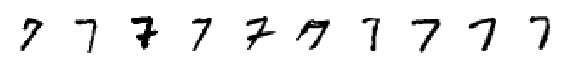

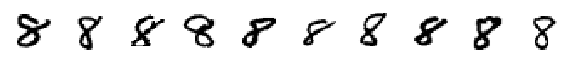

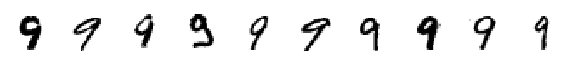

In [3]:
def P1(num_examples):

### STUDENT START ###

    #Looping through each digit and creating a blank list to store the indexes in
    for k in range(10):
        digit_list = []
        #Looping through all values in the data, if the Y values equals the current digit the index of that value
        #is appended to the digit_list. When the digit list is as long as num_examples the loop breaks.
        for i in range(len(X)):
            if Y[i] == k:
                digit_list.append(i)
                if len(digit_list) == num_examples:
                    break
                    
    #Creating a figure that is as many columns as num_examples and 10 rows with a binary color map
        plt.figure(figsize=(num_examples, 10))
        plt.rc('image', cmap = 'binary', interpolation = 'none')

    #Looping through each Y values and graphing them. A subplot is created that is num_examples columns and 
    #10 rows. For each X the X values are #converted to a 28x28 array in a row with all the other graphs for 
    #the same y value.
        count = 0
        for i in digit_list:
            pixels = np.array(X[i])
            ax = plt.subplot(num_examples, 10, count + 1)
            plt.setp(ax, xticks = (), yticks = ())
            plt.imshow(pixels.reshape(28, 28))
            count += 1
            
    #Showing the graph
    plt.show  

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    for i in k_values:
        #define the k nearest neighbors models, set k equal to k values
        knn = KNeighborsClassifier(n_neighbors = i)
        #fit the model to the mini training data
        knn.fit(mini_train_data, mini_train_labels)
        #store the predictions and accuracy 
        y_predict = knn.predict(dev_data)
        accuracy = knn.score(dev_data, dev_labels)
        #print the accuracy
        print 'The accuracy for k nearest neighbors when k =', i, 'is', round(accuracy,3)
        #if k = 1 also print out the classification report
        if i == 1:
            print(classification_report(dev_labels, y_predict))
    
### STUDENT END ###
k_values = [1, 3, 5, 7, 9]
P2(k_values)

The accuracy for k nearest neighbors when k = 1 is 0.888
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

The accuracy for k nearest neighbors when k = 3 is 0.878
The accuracy for k nearest neighbors when k = 5 is 0.869
The accuracy for k nearest neighbors when k = 7 is 0.865
The accuracy for k nearest neighbors when k = 9 is 0.863


ANSWER: The most difficult digit for 1-NN to predict is 9, it has an f1-score of 0.80, 0.02 lower than the f1-score for 3, which is the second hardest digit to predict. 9 has the second lowest precision and is tied for the lowest recall.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    knn = KNeighborsClassifier(n_neighbors = 1)
 
    #Looping through the different training data sizes
    for i in train_sizes:
        #Defining the training matrix
        p3_training_data = train_data.copy()
        p3_training_labels = train_labels.copy()
        p3_training_data, p3_training_labels = p3_training_data[:i], p3_training_labels[:i]
        #Collect the start time of fitting the model, then fit the model, the collect the end time 
        #of fitting the model. Subtract start from end time to determine how 
        #long it took to fit the model
        t1 = time.time()
        knn.fit(p3_training_data, p3_training_labels)
        t2 = time.time()
        fit_time = t2 - t1
        #Making predictions on the dev data (and storing the time it took to make the predictions)
        t3 = time.time()
        y_predict = knn.predict(dev_data)
        t4 = time.time()
        predict_time = t4 - t3
        #Storing the accuracy of the predictions and appending it to the prediction accuracy list
        predict_accuracy = knn.score(dev_data, dev_labels)
        accuracies.append(predict_accuracy)
        print 'Training size =', str(i) + ', accuracy =', str(round(predict_accuracy,3)) + ', fit time =', str(round(fit_time,3)) + ' seconds, predict time =', str(round(predict_time,3)), 'seconds'
        
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Training size = 100, accuracy = 0.72, fit time = 0.003 seconds, predict time = 0.136 seconds
Training size = 200, accuracy = 0.786, fit time = 0.058 seconds, predict time = 0.287 seconds
Training size = 400, accuracy = 0.841, fit time = 0.051 seconds, predict time = 0.507 seconds
Training size = 800, accuracy = 0.884, fit time = 0.074 seconds, predict time = 1.306 seconds
Training size = 1600, accuracy = 0.902, fit time = 0.084 seconds, predict time = 2.179 seconds
Training size = 3200, accuracy = 0.926, fit time = 0.266 seconds, predict time = 5.04 seconds
Training size = 6400, accuracy = 0.937, fit time = 0.494 seconds, predict time = 8.01 seconds
Training size = 12800, accuracy = 0.959, fit time = 2.1 seconds, predict time = 16.294 seconds
Training size = 25000, accuracy = 0.97, fit time = 7.836 seconds, predict time = 30.255 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [21]:
def P4():

### STUDENT START ###
    
    #Convert the matrices to forms that LinearRegression can use
    train_size_p4 = np.array(train_sizes)
    train_size_p4 = np.reshape(train_size_p4, (len(train_sizes),1))
    prediction_accuracy_p4 = np.array(accuracies)
    prediction_accuracy_p4 = np.reshape(prediction_accuracy_p4, (len(train_sizes),1))


    #Run the regression, print the intercept and coefficient
    reg = LinearRegression(fit_intercept = True)
    reg.fit(train_size_p4, prediction_accuracy_p4)
    print 'Estimated linear function: accuracy = %.4f + %.5f * training size' %(reg.intercept_, reg.coef_[0])
    
    #Calculate the estimated accuracy for n = 60,000
    pred_accuracy = reg.intercept_ + (60000 * reg.coef_)
    print 'The predicted accuracy of the linear model when n = 60,000 is %.2f' %(pred_accuracy)
    
    #Transformation
    transform_accuracies = []
    #Transforming all the accuracies
    for i in range(len(accuracies)):
        transform_accuracies.append(accuracies[i] * (1-accuracies[i]))
    trans_pred_accuracy = np.array(transform_accuracies)
    trans_pred_accuracy = np.reshape(trans_pred_accuracy, (len(train_sizes),1))
    #Fitting the regression
    trans_reg = LinearRegression(fit_intercept = True)
    trans_reg.fit(train_size_p4, trans_pred_accuracy)
    print 'Estimated post transformation linear function: accuracy = %.4f + %.6f * training size' %(trans_reg.intercept_, trans_reg.coef_[0])
    
    #Calculate the estimated accuracy for n = 60,000
    #First get the predicted accuracy for n = 60000, then do the inverse transformation
    pred_accuracy = trans_reg.intercept_ + (60000 * trans_reg.coef_)
    pred_transform = pred_accuracy/(pred_accuracy + 1)
    print 'The predicted accuracy of the linear model when n = 60,000 is %.2f' %(pred_transform)

    
### STUDENT END ###

P4()

Estimated linear function: accuracy = 0.8432 + 0.00001 * training size
The predicted accuracy of the linear model when n = 60,000 is 1.24
Estimated post transformation linear function: accuracy = 0.1274 + -0.000005 * training size
The predicted accuracy of the linear model when n = 60,000 is -0.21


ANSWER: For n = 60,000 a linear model predicts the an accuracy rate of 1.23, which is nonsensical because you can't predict correctly at a rate greater than 1. The problem here is that we have a dependent variable that is bound between 0 and 1, but that the linear model is not bound to making predictions between 0 and 1. A better model would limit the predictions to that 0/1 range.

Despite your office hours suggestions I couldn't get the output from the transformation to make sense. Since n is so large I keep getting negative numbers for my inverse transformation and even if they were positive the values would be too low to make sense. 

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

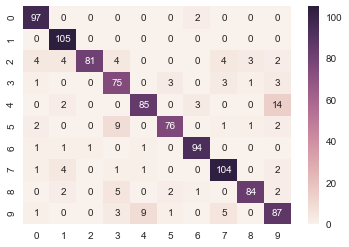

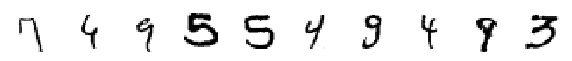

In [10]:
def P5():

### STUDENT START ###

    #Define the model, fit it to mini training data and store predictions based on dev data
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(mini_train_data, mini_train_labels)
    y_predict = knn.predict(dev_data)

    #Storing the unique labels
    labels = np.unique(y_predict)
    #Generating the confusion matrix
    confusion = confusion_matrix(dev_labels, y_predict, labels)

    #Converting the confusion matrix to a dataframe
    cm = pd.DataFrame(confusion, index = [i for i in range(10)], columns = [i for i in range(10)])
    #Using seaborn to create a labeled heatmap of the confusion matrix
    sn.heatmap(cm, fmt="d", annot = True)
        
    ###Graphing Mismatches
    
    #First setting up a blank list to store the index of mismatches and the number of
    #mismatch examples we want to graph
    mismatches = []
    num_examples = 10
    
    #Iterating through the dev data, checking if the label does not match the prediction. If not the index
    #is stored in mismatches
    for k in range(len(dev_data)):
        if dev_labels[k] != y_predict[k]:
            mismatches.append(k)
            
            
    #Creating a figure with a binary color map
    plt.figure(figsize=(10, num_examples))
    plt.rc('image', cmap = 'binary', interpolation = 'none')    

    #Randomly sample num_examples from mismatches and graph them
    count = 0
    sample = random.sample(mismatches, num_examples)
    for i in sample:
        pixels = np.array(dev_data[i])
        ax = plt.subplot(1, num_examples, count + 1)
        plt.setp(ax, xticks = (), yticks = ())
        plt.imshow(pixels.reshape(28, 28))
        count += 1
       
    
### STUDENT END ###

P5()

ANSWER: The confusion matrix shows that the two most confused digits are 4 and 9. The highest number of errors for a predicted/actual combination is predicting 9 when the actual value is 4, this happened 14times. The combinations with the second highest number of errors is a tie between predicting 4 when the actual value is 9 and predicting 3 when the actual value is 5.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [11]:
def P6():
    
### STUDENT START ###


    #There are 9 distinct types of cells, each needs a different formula for smoothing. They are:
    #Cells that are not on a border, these have all 8 neighbors
    center = ([x for x in range(29,756) if ((x+1)%28 != 0 and (x+1)%28 != 1)])
    #Cells on the top, bottom, left and right edges that are not on the corners
    top = range(1,27)
    bottom = range(757, 783)
    left_edge = [x for x in range(28, 730) if (x+1)%28 == 1]
    right_edge = [x for x in range(55,756) if x%28 == 27]
    #The four corner cells
    tl = [0]
    tr = [27]
    bl = [756]
    br = [783]

    #Cells are blurred by their adjacent cell but also by those offset by one row. This variable sets up the row offset
    r = 28

    #A function to blur cells in a matrix where the indexes of the cells has already been broken down to their region
    #Requires an output data file that is the same dimension as the input data file
    def blur(input_data, output_data):
        for i in range(len(input_data)):
            #for cells in the center their value is the average of themselves and the 8 cells around them
            for j in center:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                right = input_data[i][j+1]
                up_center = input_data[i][j-r]
                up_left = input_data[i][j-r-1]
                up_right = input_data[i][j-r+1]
                down_center = input_data[i][j+r]
                down_left = input_data[i][j+r-1]
                down_right = input_data[i][j+r+1]
                cell_val = (cell + left + right + up_center + up_left + up_right + down_center + down_left + down_right)/9
                output_data[i][j] = cell_val

            #cells on each edge are a function of themselves and their five adjacent cells
            for j in top:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                right = input_data[i][j+1]
                down_center = input_data[i][j+r]
                down_left = input_data[i][j+r-1]
                down_right = input_data[i][j+r+1]
                cell_val = (cell + left + right + down_center + down_left + down_right)/6
                output_data[i][j] = cell_val

            for j in bottom:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                right = input_data[i][j+1]
                up_center = input_data[i][j-r]
                up_left = input_data[i][j-r-1]
                up_right = input_data[i][j-r+1]
                cell_val = (cell + left + right + up_center + up_left + up_right)/6
                output_data[i][j] = cell_val 

            for j in right_edge:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                up_center = input_data[i][j-r]
                up_left = input_data[i][j-r-1]
                down_center = input_data[i][j+r]
                down_left = input_data[i][j+r-1]
                cell_val = (cell + left + up_center + up_left + down_center + down_left)/6
                output_data[i][j] = cell_val 

            for j in left_edge:
                cell = input_data[i][j]
                up_center = input_data[i][j-r]
                down_center = input_data[i][j+r]
                right = input_data[i][j+1]
                up_right = input_data[i][j-r+1]
                down_right = input_data[i][j+r+1]
                cell_val = (cell + up_center + down_center + right + up_right + down_right)/6
                output_data[i][j] = cell_val 

            #the value for cells on each corner is a function of themselves and the three adjacent cells
            for j in tl:
                cell = input_data[i][j]
                right = input_data[i][j+1]
                down_center = input_data[i][j+r]
                down_right = input_data[i][j+r+1]
                cell_val = (cell + right + down_center + down_right)/4
                output_data[i][j] = cell_val

            for j in tr:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                down_center = input_data[i][j+r]
                down_left = input_data[i][j+r-1]
                cell_val = (cell + left + down_center + down_left)/4
                output_data[i][j] = cell_val 

            for j in bl:
                cell = input_data[i][j]
                right = input_data[i][j+1]
                up_center = input_data[i][j-r]
                up_right = input_data[i][j-r+1]
                cell_val = (cell + right + up_center + up_right)/4
                output_data[i][j] = cell_val 

            for j in br:
                cell = input_data[i][j]
                left = input_data[i][j-1]
                up_center = input_data[i][j-r]
                up_left = input_data[i][j-r-1]
                cell_val = (cell + left + up_center + up_left)/4
                output_data[i][j] = cell_val 


    #Setting up the training and dev data. Also creating blank matrices with the same 
    #dimensions to store the blurred data
    p6_train_data = mini_train_data.copy()
    p6_noise_train_data = np.zeros(p6_train_data.shape)
    p6_dev_data = dev_data.copy()
    p6_noise_dev_data = np.zeros(p6_dev_data.shape)

    #Blurring the training and dev data
    blur(p6_train_data, p6_noise_train_data)
    blur(p6_dev_data, p6_noise_dev_data)

    
    #Model using only blurred training data
    #Fit the model and record accuracy
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(p6_noise_train_data, mini_train_labels)
    accuracy = knn.score(dev_data, dev_labels)
    print "The accuracy of 1-NN when the training data is blurred is", round(accuracy,3)


    #Model using only blurred dev data
    #Fit the model and record accuracy
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(mini_train_data, mini_train_labels)
    accuracy = knn.score(p6_noise_dev_data, dev_labels)
    print "The accuracy of 1-NN when the dev data is blurred is", round(accuracy,3)


    #Model where both training and dev data is blurred
    #Fit the model and record accuracy
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(p6_noise_train_data, mini_train_labels)
    accuracy = knn.score(p6_noise_dev_data, dev_labels)
    print "The accuracy of 1-NN when both the dev and training data is blurred is", round(accuracy,3)


### STUDENT END ###

P6()

The accuracy of 1-NN when the training data is blurred is 0.908
The accuracy of 1-NN when the dev data is blurred is 0.871
The accuracy of 1-NN when both the dev and training data is blurred is 0.902


ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [12]:
def P7():

### STUDENT START ###

    #0/1 Naive Bayes
    #Setting up training data and dev data
    nb_train_data = mini_train_data.copy()
    nb_train_labels = mini_train_labels.copy()
    nb_dev_data = dev_data.copy()
    nb_dev_labels = dev_labels.copy()

    #Defining the model, fitting it to the training data and predicting the dev data
    bern = BernoulliNB(binarize = 0.5)
    bern.fit(nb_train_data,nb_train_labels)
    bern.predict(nb_dev_data)
    nb_accuracy = bern.score(nb_dev_data, nb_dev_labels)

    ##################
    #0/1/2 Naive Bayes
    #Setting up training data anddev data
    multinb_train_data = mini_train_data.copy()
    multinb_train_labels = mini_train_labels.copy()
    multinb_dev_data = dev_data.copy()
    multinb_dev_labels = dev_labels.copy()

    #Creating a function to convert data of 0/1/2 values.
    #It loops across all values in the data and assigns 0/1/2 value based on their value.
    #Values <= 0.25 are assigned 0, 0.25 < value <= 0.75 are assigned 1, and values > 0.75 are assigned 2.

    def multi_nb_transform(data):
        for i in range(len(data)):
            for j in range(784):
                if data[i,j] <= 0.25:
                    data[i,j] = 0
                elif data[i,j] <= 0.75:
                    data[i,j] = 1
                else:
                    data[i,j] = 2
        return data

    #Calling the above function on the training and dev data
    multi_nb_transform(multinb_train_data)
    multi_nb_transform(multinb_dev_data)

    #Defining the model, fittingit to the training data and predicting the dev data
    multinb = MultinomialNB()
    multinb.fit(multinb_train_data, multinb_train_labels)
    multinb.predict(multinb_dev_data)
    multinb_accuracy = multinb.score(multinb_dev_data, multinb_dev_labels)

    print "The accuracy of a 0/1 Naive Bayes model is", nb_accuracy
    print "The accuracy of a 0/1/2 Naive Bayes model is", multinb_accuracy
    
### STUDENT END ###

P7()

The accuracy of a 0/1 Naive Bayes model is 0.815
The accuracy of a 0/1/2 Naive Bayes model is 0.806


ANSWER: In this case the multi-class version makes the accuracy of the results about 1% worse than the predictions from the two class model. In general I would expect the predictions to improve with the multi-class model because it throws less information away than the two class model does, but with this data and mapping of values to 0/1/2 that was not the case. It's possible that with some tuning a better value mapping could be found to improve the accuracy of the multinomial naive Bayes. But for this data it's apparently a little more important to know just if a cell is mostly dark or light than it is to add one gradient to that knowledge.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [15]:
def P8(alphas):

### STUDENT START ###

    #Setting up training data and dev data
    nb_train_data = mini_train_data.copy()
    nb_train_labels = mini_train_labels.copy()
    nb_dev_data = dev_data.copy()
    nb_dev_labels = dev_labels.copy()

    #Defining the grid search algorithm and fitting the data
    bern = BernoulliNB(binarize = 0.5)
    grid = GridSearchCV(bern, alphas, cv = 10, scoring = 'accuracy')
    grid.fit(nb_train_data, nb_train_labels) 
    
    #Printing the scores for each alpha value and the best alpha value
    pprint(grid.grid_scores_)
    print "The best alpha value is: ", grid.best_params_

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
P8(alphas)


[mean: 0.09200, std: 0.00213, params: {'alpha': 0.0},
 mean: 0.82000, std: 0.03221, params: {'alpha': 0.0001},
 mean: 0.81700, std: 0.03187, params: {'alpha': 0.001},
 mean: 0.81800, std: 0.03043, params: {'alpha': 0.01},
 mean: 0.81500, std: 0.03467, params: {'alpha': 0.1},
 mean: 0.81000, std: 0.03890, params: {'alpha': 0.5},
 mean: 0.80400, std: 0.03811, params: {'alpha': 1.0},
 mean: 0.80100, std: 0.03425, params: {'alpha': 2.0},
 mean: 0.74800, std: 0.03473, params: {'alpha': 10.0}]
The best alpha value is:  {'alpha': 0.0001}


ANSWER: The best value for alpha with this data is 0.0001, which jut barely beats out 0.001 and 0.01. The accuracy when alpha = 0 is 0.092, by far the lowest value for any of the alphas tested (the next lowest was 0.748). This is expected because when alpha is 0 the model can predict a likelihood of zero for one of the classes, which will cause the join probability of all the classes to be 0, so it won't predict anything and is thus wrong. It's clear in this case that is happening to a lot of the inputs and it causes the model's accuracy to degrade significantly.  

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Gaussian NB model accuracy: 0.621
Theta [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
Sigma [[  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 ..., 
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]
 [  1.98697608e-10   1.98697608e-10   1.98697608e-10 ...,   1.98697608e-10
    1.98697608e-10   1.98697608e-10]]
The accuracy of the Gaussian NB model with added noise to just the trainin

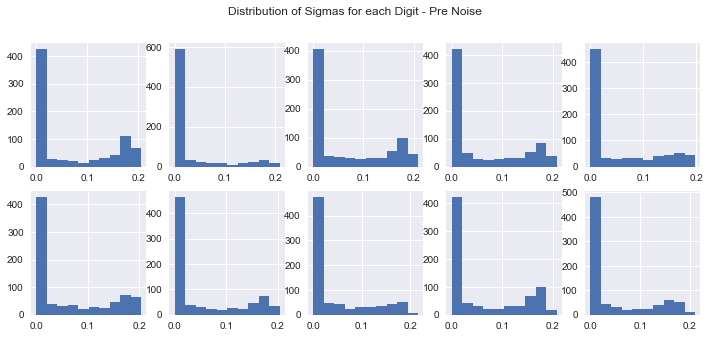

In [18]:
def P9():

### STUDENT START ###

    #Setting up the training and dev data
    gnb_train_data = mini_train_data.copy()
    gnb_noise_train_data = np.zeros(gnb_train_data.shape)
    gnb_dev_data = dev_data.copy()
    gnb_noise_dev_data = np.zeros(gnb_dev_data.shape)

    #Defining the model, fitting it, storing the accuracy and printing out the theta and sigma
    gnb = GaussianNB()
    gnb.fit(gnb_train_data, mini_train_labels)
    gnb_accuracy = gnb.score(gnb_dev_data, dev_labels)
    print "Gaussian NB model accuracy:", gnb_accuracy
    print "Theta", gnb.theta_
    print "Sigma", gnb.sigma_

    #Plot sigma distributions to see if they're normally distributed
    figs = plt.figure(figsize = (12,5))
    figs.suptitle('Distribution of Sigmas for each Digit - Pre Noise')
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.hist(gnb.sigma_[i-1], bins = 10)

    #Defining a function to add noise to make the distributions more normal
    def add_noise(old_data, new_data):
        for i in range(len(old_data)):
            for j in range(784):
                new_data[i][j] = old_data[i][j] + 0.5 * np.random.rand()

    #Running that function on both training and dev data
    add_noise(gnb_train_data, gnb_noise_train_data)
    add_noise(gnb_dev_data, gnb_noise_dev_data)

    #Fitting the model, first with noisy training data and unmodified dev data. Then with noisy training
    #and dev data
    gnb_noise = GaussianNB()
    gnb_noise.fit(gnb_noise_train_data, mini_train_labels)
    gnb_noise_accuracy = gnb_noise.score(gnb_dev_data, dev_labels)
    print "The accuracy of the Gaussian NB model with added noise to just the training data is:", gnb_noise_accuracy
    gnb_noise_accuracy = gnb_noise.score(gnb_noise_dev_data, dev_labels)
    print "The accuracy of the Gaussian NB model with added noise to both training and dev data is:", gnb_noise_accuracy

### STUDENT END ###

P9()

ANSWER: The Gaussian NB models requires that the distributions be roughly normal. From looking at the histograms for each digit that is clearly not the case with this data. To correct the issue we add some noise from the uniform distribution to each point. After doing this the model accuracy improves from 0.62 to about 0.8, which is in line with the accuracy we got from Bernoulli Naive Bayes.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

**My function works great for generating digits but I couldn't get it to display the generated digits for all digits simultaneously. The function as is will only display the generated digits for the largest number in k loop. So in the below form it will display 20 generated 9 digits, if you change the range value in the k loop it will display 20 generated digits for the highest value in that range.**

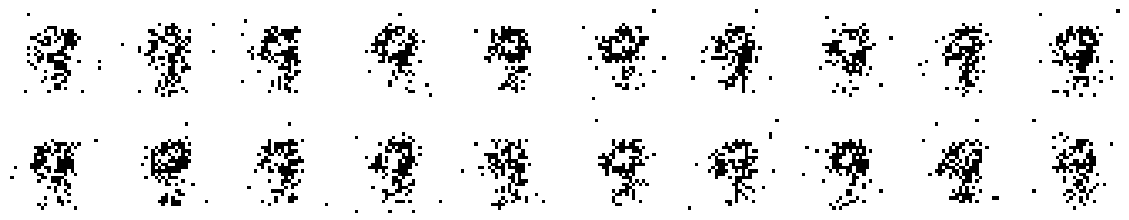

In [19]:
def P10(num_examples):

### STUDENT START ###

    bern = BernoulliNB(binarize = 0.5)
    bern.fit(mini_train_data, mini_train_labels)
    bern_probabilities = np.exp(bern.feature_log_prob_)

    table = plt.figure(figsize = (20,10))

    #Iterating across each digit
    for k in range(10):
        #And iterating 20 times to make 20 images
        for j in range(num_examples):
            generated_array = np.random.rand(784)
            #Drawing random numbers from a uniform distribution for each ofthe 784 values
            for i in range(len(generated_array)):
                #Comparing the value generated to the predicted probabilities and assigning 0/1 values based on it
                if generated_array[i] < bern_probabilities[k,i]:
                    generated_array[i] = 1
                else:
                    generated_array[i] = 0
            #Graphing the generated numbers
            #As I mentioned above I could only get this to display the last digit in the range, changing the range
            #will show it works for lower digits as well.
            generated_image = generated_array.reshape(28,28)
            count = 0
            ax = table.add_subplot(5,10,j+1)
            plt.imshow(generated_image, cmap = 'Greys')
            plt.setp(ax,xticks=(), yticks=())
            count += 1

        plt.show

### STUDENT END ###

P10(20)

ANSWER: Depending on the digit the generated digits are somewhat recognizable as the training digits, but they are much messier than handwritten digits would be. There's random pixels that are either on or off that would clearly not be the case for a handwritten digit. Some digits (2, 6 and 8 are good examples) end up mostly looking like blobs with a tail coming out while other tend to be pretty legible (0, 1 and 3 are good examples of this).  

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

**For this problem the function I wrote trying to answer the high level question didn't meld well with the more specific instructions with regards to updating the correct and total counters. It returns the same answers just in a different way.**#

In [20]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    #Fitting the model and predicting the data
    bern = BernoulliNB(alpha = 0.1, binarize = 0.5)
    bern.fit(mini_train_data, mini_train_labels)
    bern.predict(dev_data)

    #Storing the probability estimates for the dev data
    probability_estimates = bern.predict_proba(dev_data)

    #Iterating across the probability estimates and extracting the max value of each
    max_p = []
    for i in range(len(probability_estimates)):
        max_p.append(np.amax(probability_estimates[i]))


    #A function that returns the accuracy of the model where the predictions are between the upper and lower bounds
    def calibrate_test(lower_bound, upper_bound):
        p_in_bucket = []    
        for i in range(len(max_p)):
            #Checking if the max probability is between the bounds, if it is append it's index to p_in_bucket
            if max_p[i] > lower_bound:
                if max_p[i] <= upper_bound:
                    p_in_bucket.append(i)
        #Create new dev_data (and labels) with only observations where the model's estimate of the max probability is between the bounds
        p_dev_data = dev_data[p_in_bucket]
        p_dev_labels = dev_labels[p_in_bucket]
        bucket_size = len(p_in_bucket)
        #Getting the accuracy of the new data
        accuracy = bern.score(p_dev_data, p_dev_labels)
        print "There are", bucket_size, "values in the dev data where the model's prediction was made with an estimated probability between", lower_bound, "and", str(upper_bound) + ". For those values the accuracy of the predictions is", round(accuracy,3), "\n" 

        
    
    #Looping through all the bucket sizes
    for i in range(len(buckets[:-1])):
        lower_bound = buckets[i]
        upper_bound = buckets[i+1]
        calibrate_test(lower_bound, upper_bound)            

    print "The last line says the range is 1.0 to 1.0, it is really from 0.9999999999999 to 1.0 but python automatically rounds 0.9999999999999 to 1.0 and I don't know how to correct it."            

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

There are 35 values in the dev data where the model's prediction was made with an estimated probability between 0.5 and 0.9. For those values the accuracy of the predictions is 0.314 

There are 95 values in the dev data where the model's prediction was made with an estimated probability between 0.9 and 0.999. For those values the accuracy of the predictions is 0.442 

There are 75 values in the dev data where the model's prediction was made with an estimated probability between 0.999 and 0.99999. For those values the accuracy of the predictions is 0.653 

There are 63 values in the dev data where the model's prediction was made with an estimated probability between 0.99999 and 0.9999999. For those values the accuracy of the predictions is 0.714 

There are 63 values in the dev data where the model's prediction was made with an estimated probability between 0.9999999 and 0.999999999. For those values the accuracy of the predictions is 0.81 

There are 92 values in the dev data where th

ANSWER: Based on the calibration accuracy of the model I would describe it as weakly calibrated. The accuracy of predictions goes up as the model's confidence goes up, but the accuracy of the predictions lags behind the model's confidence.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()